In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.stem import stemming
from nltk.corpus import stopwrods
from nltk.tokenize import word_tokenize, sent_tokenize

ModuleNotFoundError: No module named 'nltk'

In [5]:
df = pd.read_csv('/Users/kxshrx/Asylum/Datasets/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
df.shape

(5728, 2)

In [9]:
df.columns

Index(['text', 'spam'], dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [22]:
df.isna().sum()

text    0
spam    0
dtype: int64

In [27]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

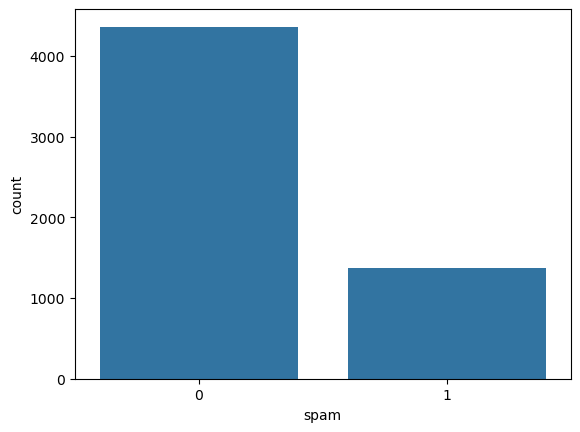

In [36]:
# sns.countplot(x="spam",data=df)
sns.countplot(df,x='spam')
plt.show()

# balancing the dataset 

In [48]:
ham_msg = df[df.spam==0]
spam_msg = df[df.spam==1]
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)
balanced_df = pd.concat([ham_msg,spam_msg],axis = 0)
print(ham_msg.shape,spam_msg.shape,balanced_df.shape)
balanced_df.head(10)

(1368, 2) (1368, 2) (2736, 2)


,text,spam
1547,Subject: interview schedule for jinbaek kim i...,0
2730,"Subject: re : wednesday meeting eric , i thi...",0
4843,Subject: re : london research group i ' d do ...,0
2856,"Subject: re : congratulations vince , thanks ...",0
3804,Subject: osman sezgen steve kromer is request...,0
2392,"Subject: re : houston visit soussan , thanks...",0
5154,Subject: impending visit july 5 - 7 vince : ...,0
4790,Subject: re : the garp 2001 convention andrea...,0
5169,"Subject: rtp project vince , targetted confe...",0
2978,"Subject: re : houston visit soussan , it see...",0


<Axes: xlabel='spam', ylabel='count'>

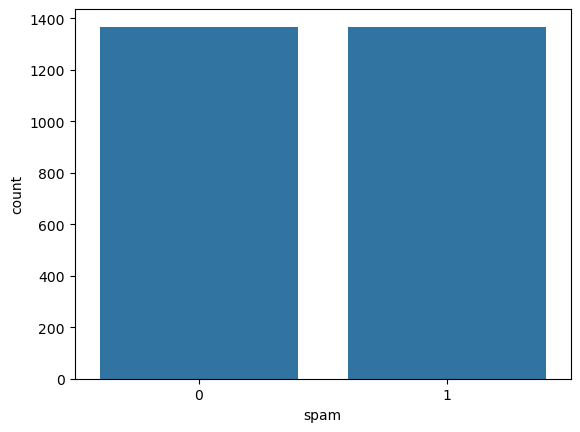

In [50]:
sns.countplot(balanced_df, x='spam')

# stopwords removal